<a href="https://colab.research.google.com/github/space-cap/final-team3-docs/blob/main/%5BKernel_Academy_%EB%B0%B1%EC%97%94%EB%93%9C_%EB%B6%80%ED%8A%B8%EC%BA%A0%ED%94%84_12%EA%B8%B0%5DLangchain_RAG_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upstage Solar와 Langchain을 활용한 RAG 구축 실습 프로젝트

## 실습 개요
이번 실습은 RAG (Retrieval-Augmented Generation)의 개념을 이해하고, Upstage의 Solar-Embedding-1-Large-Query와 Solar-Pro2을 활용하여 단계별로 RAG 시스템을 직접 구축해보는 것을 목표로 합니다.

## 실습 목표
1. LLM Chain을 구현하여 간단한 ChatBot을 구현할 수 있다.
2. RAG 개념을 설명하고 단계별 RAG 시스템을 구축할 수 있다.

## 실습 목차
- **Session. RAG 구현하기**:  RAG 개념을 이해하고 단계별로 RAG를 직접 구현해보자 <br>
    - 1 What is RAG?
    - 2 - 단계별 RAG 구현해보기
      - 2-1 문서 전처리 (Document Preprocessing) <br>
        (1) Loading Documents <br>
        (2) Text Splitting <br>
        (3) Text Embedding <br>
        (4) Vectorstore <br>
      - 2-2 RAG 실행하기  <br>
       (1) Retrieving Related Chunks from the Vectorstore <br>
       (2) Creating a Prompt with Retrieved Results <br>
       (3) Implementing an LLM Chain <br>
       (4) Executing the LLM Chain and Generating the Response
    - 3 - Web에서 데이터 가져와서 RAG 구축 연습해보기


In [ ]:
# 약 1분 소요
!pip install -qU openai langchain langchain-upstage langchain-chroma langchain-community getpass4

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 951.0/951.0 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import getpass
import warnings

warnings.filterwarnings("ignore")

# if "OPENAI_API_KEY" not in os.environ or not os.environ["OPENAI_API_KEY"]:
#     os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OPENAI API key: ")
#     print("API key has been set successfully.")
# else:
#     print("API key is already set.")

if "UPSTAGE_API_KEY" not in os.environ or not os.environ["UPSTAGE_API_KEY"]:
    os.environ["UPSTAGE_API_KEY"] = getpass.getpass("Enter your UPSTAGE API KEY: ")
    print("API key has been set successfully.")
else:
    print("API key is already set.")

Enter your UPSTAGE API KEY: ··········
API key has been set successfully.


# RAG 구현하기

1. What is RAG?

2. 단계별 RAG 구현해보기

3. Web에서 데이터 불러와서 RAG 구축 연습해보기

### 1- What is RAG

![Overview](https://images.contentstack.io/v3/assets/bltefdd0b53724fa2ce/blt1496b19e4c6f9e66/66ba412a46b3f4241b969f48/rag-in-action.jpeg)


### 📘  RAG 란?

- 정의 :  RAG(Retrieval-Augmented Generation)는 **검색 엔진**과 **LLM(대규모 언어 모델)**을 결합한 기술로, 주어진 쿼리에 대해 LLM이 더 정확하고 맥락에 맞는 응답을 생성할 수 있도록 도와줍니다.
- 방식
  - 이 기술은 LLM이 보유하지 않는 정보를 보충하기 위해 외부 문서를 검색하여 이를 기반으로 응답을 생성합니다.
  - 더 구체적으로는 외부 문서를 로드하고, 전처리 단계를 통해서 이를 조각(chunks)으로 분리한 후, 쿼리와 관련된 조각을 가져와 LLM 프롬프트에 포함하는 방식으로 외부 정보를 LLM에게 제공한 후, LLM이 응답을 생성합니다.
- 기대효과 : LLM이 자체적으로 보유하지 않는 정보를 외부 문서를 통해 보충해주기에, LLM의 한계인 Hallucination과 Knowledge Cutoff 문제를 해결할 수 있습니다.




## 2 - 단계별 RAG 구현해보기

### 📘 각 단계별 설명

1. **문서 전처리 (Document Preprocessing)**:
   1. **문서 로드 (Loading Documents)**: `Upstage Document Parse API` 또는 오픈소스인 `PyPDFLoader`를 사용해 외부 PDF 문서를 HTML 텍스트 데이터 형태로 로드합니다.
   2. **텍스트 분할 (Text Splitting)**: 긴 문서를 작은 조각(chunks)으로 분할하여 검색 효율성을 높입니다. 이를 통해 모델이 보다 구체적이고 정확하게 정보를 찾을 수 있습니다.
   3.  **임베딩 (Embedding)**: `Upstage Solar Embedding API` 또는 Huggingface의 여러 오픈소스 임베딩 모델을 사용해 텍스트를 벡터로 변환합니다. 이 작업은 문서의 의미/문맥을 벡터 공간에 매핑하여 모델이 이를 검색 및 분석에 활용할 수 있도록 합니다.
   4. **벡터스토어 (Vectorstore)**: 임베딩된 벡터를 저장하는 데이터베이스로, RAG 시스템 내에서 검색할 수 있는 공간을 제공합니다.

2. **RAG 실행 (Implementing RAG)**:
   5. **관련 조각 검색 (Retrieving Related Chunks)**: 벡터스토어에서 쿼리와 관련된 조각을 검색해 가져옵니다. 이를 통해 LLM이 응답을 생성할 때 필요한 정보를 제공합니다.
   6. **프롬프트 생성 (Creating a Prompt with Retrieved Results)**: 검색된 조각을 프롬프트에 포함시켜 LLM이 문맥을 이해하고 응답할 수 있도록 합니다.
   7. **LLM 체인 구현 (Implementing an LLM Chain)**: 위의 입력 프롬프트를 기반으로 LLM 체인을 정의합니다.
   8. **LLM 체인 실행 및 응답 출력 (Executing the LLM Chain and Generating the Response)**: LLM 체인을 실행하여 최종 응답을 생성합니다.


### 2-1 문서 전처리 (Document Preprocessing)

#### (1) Loading Documents by PyPDFLoader

In [ ]:
# Transformer 논문 다운로드
!wget -q -O transformer_paper.pdf https://arxiv.org/pdf/1706.03762

In [ ]:
# Document Loader로 다운로드 된 문서 불러오기
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("transformer_paper.pdf")
docs = loader.load()
print(f"Loaded {len(docs)} documents.")
print(docs[0].page_content[:500])

Loaded 15 documents.
Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.comNoam Shazeer∗
Google Brain
noam@google.comNiki Parmar∗
Google Research
nikip@google.comJakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.comAidan N. Gomez∗ †
University of Toronto
aidan@cs.toronto.eduŁukasz Kaise


#### (2) Text Splitting



**📘Text Splitting을 하는 이유**
- 만약, 문서가 길지 않고 짧다면 그대로 넣어주도 무방함.
- 하지만, 문서의 사이즈가 큰 경우
  - LLM에게 입력할 수 있는 최대 토큰 수를 초과
  - 쿼리와 연관되지 않은 불필요한 부분이 포함되어 성능이 잘 나오지 않음.
- 따라서  긴 문서를 작은 조각(chunks)으로 분할하여 검색 효율성을 높입니다. 이를 통해 모델이 보다 구체적이고 정확하게 정보를 찾을 수 있습니다.

<b>📘RecursiveCharacterTextSplitter </b>
- 가장 대표적으로 많이 활용되는 Text Splitter
- **방식**
  - `RecursiveCharacterTextSplitter` : 글자수가 `chunk size`를 넘지 않을 때까지 아래와 같이 text를 분리함.
  -  `(['\n\n', '\n', ' ', ''])` : 문단, 문장, 단어 순서로 문서를 분리하다가 chunk 내 글자수가 `chunk size` 보다 작아지면 분리함.
- **파라미터**
  - `chunk_size` : 하나의 Chunk당 최대 글자 수
  - `chunk_overlap` : 각 chunk 마다 겹치는 글자 수
    - chunk 마다 일부 내용을 겹쳐서 분할된 chuck 마다 맥락이 이어질수 있도록 하기 위함.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)
splits = text_splitter.split_documents(docs)
print("Number of splits:", len(splits))

Number of splits: 264


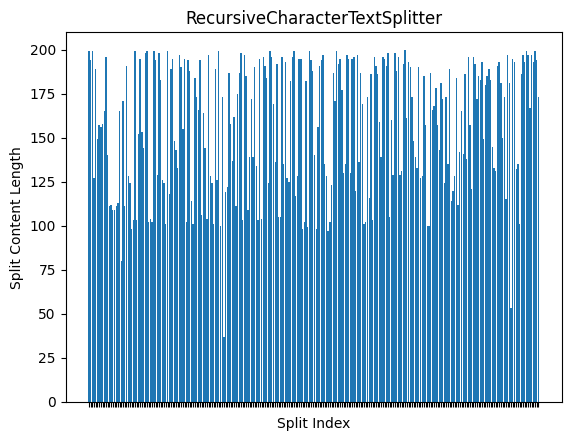

In [ ]:
# split된 결과 확인
import matplotlib.pyplot as plt

split_lengths = [len(split.page_content) for split in splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.title("RecursiveCharacterTextSplitter")
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.xticks(range(len(split_lengths)), [])
plt.show()

#### (3) Embedding

<img src="https://qdrant.tech/articles_data/what-are-embeddings/How-Embeddings-Work.jpg" alt="vector embedding" width="600" />

**Embedding 정의**
- Embedding은 **자연어(텍스트) 데이터**를 컴퓨터가 이해할 수 있는 **숫자** 형식으로 변환하는 것.
- 사람이 이해하는 텍스트 정보를 컴퓨터가 이해할 수 있는 형식(=Vector)으로 변환하여 데이터를 LLM 등 모델에 쉽게 전달할 수 있도록 합니다.

**`Upstage Solar Embedding API`**

<img src="https://cdn.prod.website-files.com/6743d5190bb2b52f38e99ecd/6762f6d388a6d5a0d450b3e2_%25E1%2584%2589%25E1%2585%25B3%25E1%2584%258F%25E1%2585%25B3%25E1%2584%2585%25E1%2585%25B5%25E1%2586%25AB%25E1%2584%2589%25E1%2585%25A3%25E1%2586%25BA%2B2024-05-16%2B%25E1%2584%258B%25E1%2585%25A9%25E1%2584%2592%25E1%2585%25AE%2B3.57.59.avif" alt="solar embedding" width="600" />

- 성능 : 한국어/영어/일본어 모두 널리 사용되는 임베딩 모델보다 성능이 뛰어남

**RAG에서 Embedding은 VectorStore 에서 모델을 지정하여 활용할 수 있습니다**


#### (4) 벡터스토어 (VectorStore)



**벡터**를 저장하는 데이터베이스로, RAG 시스템 내에서 검색할 수 있는 공간을 제공합니다.
- VectorStore마다 지원하는 검색 알고리즘이 달라짐.
- Vectorstore 유형
  -  로컬 : 내 컴퓨터에 저장
  -  Cloud : 각 DB 회사 서버에 저장
- Langchain이 제공하는 더 다양한 VectorStore : [링크](https://python.langchain.com/docs/integrations/vectorstores/)

**ChromaDB**
- Cloud 기반 오픈소스 벡터 데이터베이스
- 임베딩 Vector 저장 및 검색 기능
- 문서 추가 및 업데이트, 삭제
- 다양한 검색 기능 제공
- Langchain과 통합되어 제공

In [ ]:
# Embedding 불러오고, 선정한 Vector Store에 저장하기
from langchain_upstage import UpstageEmbeddings
from langchain_chroma import Chroma

embeddings = UpstageEmbeddings(model='embedding-query') # API calls
vectorstore = Chroma.from_documents(splits, embeddings)

**참고**
- [ChromaDB LangChain Documentation](https://python.langchain.com/docs/integrations/vectorstores/chroma/)
- [ChromaDB Official Documentation](https://docs.trychroma.com/getting-started)

### 2-2 RAG 실행하기

#### (5) Retrieving Related Chunks

- 벡터스토어에서 사용자의 질문(쿼리)와 유사한 문서를 검색하는 과정입니다. LLM이 응답을 생성할 때 필요한 정보를 제공합니다.

- Retriever 유형
  - **Sparse Retriever**: 키워드 검색
    - 쿼리를 키워드 벡터로 전환하여 키워드 기반 검색을 진행합니다.
    - 특정 도메인 지식(e.g. 의학, 법률) 등을 검색할 때 용이합니다.
    - 대표 알고리즘 : TF-IDF, BM25
  - **Dense Retriever**: 의미 검색
    - 쿼리를 벡터로 임베딩하여 가장 유사도가 높은 chunk를 찾습니다.
    - 복잡한 자연어 질문에 대한 검색 시 용이합니다.
    - 대표 알고리즘 : FAISS

**참고** <br>
- [Lanchain - Retriever](https://python.langchain.com/docs/integrations/retrievers/)  documentation을 통해 더 자세한 내용 참고 바랍니다
- [MMR 알고리즘](https://wikidocs.net/231585) 에 대한 설명


In [ ]:
# retriever 정의하고 retrieve한 결과 받아오기
query = "How many layers in transformer?"
retriever = vectorstore.as_retriever(
    search_type="mmr",
    search_kwargs={'k':20}
)
result_docs = retriever.invoke(query)
outputs = [doc.page_content for doc in result_docs]
from pprint import pprint

pprint(outputs[5])

('models have not been able to attain state-of-the-art results in small-data '
 'regimes [37].\n'
 'We trained a 4-layer transformer with dmodel = 1024 on the Wall Street '
 'Journal (WSJ) portion of the')


#### (6) Creating a Prompt with Retrieved Results
- 검색된 문서 chunk들을 프롬프트에 포함시켜 LLM이 문맥을 이해하고 응답할 수 있도록 합니다.

In [ ]:
# context에 검색된 chunk들을 넣어줍니다.
# (지난 시간에 배웠던) LLM Chain 구성하는 법.
# 1. llm 정의, 2. prompt 정의, 3. chain 정의, 4. chain 호출

# from langchain_openai import ChatOpenAI
from langchain_upstage import ChatUpstage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            너는 인공지능 챗봇으로, 주어진 문서를 정확하게 이해해서 답변을 해야해.
            문서에 있는 내용으로만 답변하고 내용이 없다면, 잘 모르겠다고 답변해.
            답변은 꼭 한글로 해줘. 나 영어 잘 못해.
            ---
            CONTEXT:
            {context}
            """,
        ),
        ("human", "{input}"),
    ]
)

llm = ChatUpstage(model='solar-pro2')

#### (7) Implementing an LLM Chain
- 위의 입력 프롬프트를 기반으로 LLM 체인을 정의합니다.


In [ ]:
chain = prompt | llm | StrOutputParser()

#### (8) Executing the LLM Chain and Generating the Response
-  LLM 체인을 실행하여 최종 응답을 생성합니다.

In [ ]:
from pprint import pprint

context = "\n\n".join([doc.page_content for doc in result_docs])
response = chain.invoke({'context' : context, 'input' : query})
print(response)

주어진 문서에 따르면, Transformer 모델의 기본 구성은 다음과 같습니다:

1. **인코더(Encoder)**:  
   - `N = 6`개의 동일한 레이어로 구성된 스택  
   - 각 레이어는 2개의 서브레이어 포함:  
     - 멀티헤드 셀프 어텐션 메커니즘  
     - 포지션별 완전 연결 피드포워드 네트워크  

2. **디코더(Decoder)**:  
   - `N = 6`개의 동일한 레이어로 구성된 스택  
   - 각 레이어는 3개의 서브레이어 포함:  
     - 멀티헤드 셀프 어텐션 메커니즘  
     - 인코더 출력에 대한 멀티헤드 어텐션  
     - 포지션별 완전 연결 피드포워드 네트워크  

### 추가 정보
- **변형 모델**: 문서 내 영어 구구조 분석 실험에서는 **4-레이어 Transformer**가 언급되었으며, 이는 특정 태스크에 맞게 조정된 경우입니다.  
- **기본 구성**은 인코더와 디코더 각각 **6개의 레이어**로 이루어져 있음을 명시합니다.  

따라서, **표준 Transformer 모델은 인코더와 디코더 각각 6개의 레이어**로 구성됩니다.


## 3 - Web에서 데이터 불러와서 RAG 구축 연습해보기

- langchain_community에 있는 WebBaseLoader를 이용하여 wikipedia의 내용을 불러와서 RAG를 구축하는 예제를 연습해봅니다.


In [ ]:
!pip install -qU langchain_community

In [ ]:
from langchain.document_loaders import WebBaseLoader

# 1. 웹 페이지 로드
loader = WebBaseLoader("https://en.wikipedia.org/wiki/Python_(programming_language)")
data = loader.load()

# 2. 텍스트 분할
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200, chunk_overlap=20
)

splits = text_splitter.split_documents(data)

# 3. 임베딩 및 벡터 저장소 생성
vectorstore = Chroma.from_documents(
     documents=splits, embedding=UpstageEmbeddings(model="embedding-query")
)

# 4. Dense Retriever 생성
query = "파이썬이 처음 공개된 연도는?"

# Dense Retriever 생성
retriever = vectorstore.as_retriever(
    search_type= 'mmr',     # default : similarity(유사도) / mmr 알고리즘
    search_kwargs={"k": 10}  # 쿼리와 관련된 chunk를 10개 검색하기 (default : 4)
)

result_docs = retriever.invoke(query) # 쿼리 호출하여 retriever로 검색

# 5. ChatPromptTemplate 정의
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
            너는 인공지능 챗봇으로, 주어진 문서를 정확하게 이해해서 답변을 해야해.
            문서에 있는 내용으로만 답변하고 내용이 없다면, 잘 모르겠다고 답변해.
            ---
            CONTEXT:
            {context}
            """,
        ),
        ("human", "{input}"),
    ]
)

# 6. LLMChain 정의
llm = ChatUpstage(model='solar-pro2')
chain = prompt | llm | StrOutputParser()

# 7. 질문 및 답변
response = chain.invoke({"context": result_docs, "input": query})
response

'주어진 문서에 따르면, 파이썬은 **1991년**에 처음 공개되었습니다.  \n\n- 첫 번째 문서에서 언급된 내용:  \n  *"Python was conceived in the late 1980s... (he first released it in 1991 as Python 0.9.0.)"*  \n\n따라서 정답은 **1991년**입니다.'

## (Go Further) Advanced RAG pipeline

![advanced_rag](https://www.elastic.co/search-labs/_next/image?url=https%3A%2F%2Fcdn.sanity.io%2Fimages%2Fme0ej585%2Fsearch-labs-import-testing%2Fdafa7250e7c4ead4d9b4aed7c407509131929749-1440x572.png&w=1920&q=75)